In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import json_normalize
import json
import numpy

with open('../data/dataset.json', 'r') as file:
    data = json.load(file)

df = json_normalize(data)

In [29]:
df

,timestamp,text,text_id,user,user_id
0,1730332800000,Running a business means juggling countless ad...,2018569761,danielwoodard,1077866112
1,1730332800000,Liz Truss is walking in the lingering shadow o...,2092717718,nelsonjacqueline,1089670430
2,1730332800000,The UK is bracing for war as government buildi...,2059143248,ihooper,1007478642
3,1730332800000,Marrying a second or third cousin once removed...,2008209828,wrightnicholas,1039258480
4,1730332800000,It's truly disgraceful how the Indian National...,2001239278,michael51,1021455936
...,...,...,...,...,...
70255,1730419192000,"@bakerjulie: ""Saranghae, I’m your resident K-P...",2086649509,valdezjennifer,1094330726
70256,1730419192000,Soaring to new heights with @sweeneyanthony! T...,2039889186,nashshaun,1015245531
70257,1730419194000,"Hey @james20 @paul47, did you see the latest f...",2020468196,brownregina,1029384492
70258,1730419198000,Check out the fundraiser exhibition by @joanna...,2037744299,dkey,1046050046


Timestamp Analysis:
- convert timestamp into date format
- analyze posting activity trends over time
- determine when users are most active (time of day is the only one that makes sense here, because we have data of only one day)

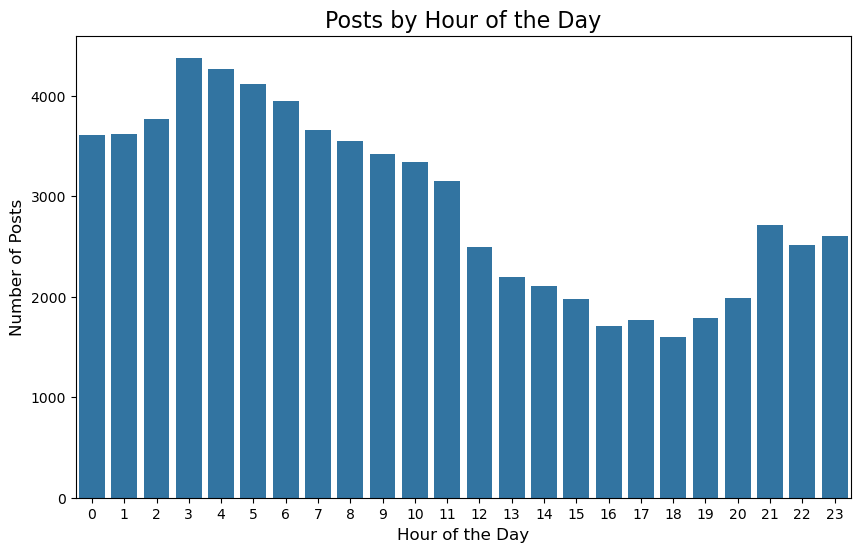

Summary of Posts by Hour:
hour
0     3611
1     3621
2     3766
3     4376
4     4261
5     4115
6     3948
7     3655
8     3547
9     3414
10    3342
11    3148
12    2495
13    2191
14    2102
15    1974
16    1710
17    1768
18    1600
19    1791
20    1991
21    2717
22    2516
23    2601
Name: count, dtype: int64


In [30]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Extract temporal features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Plot 1: Posts by Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Posts by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.show()

# Summary Statistics
print("Summary of Posts by Hour:")
print(df['hour'].value_counts().sort_index())

Most actitvity at three in the morning.

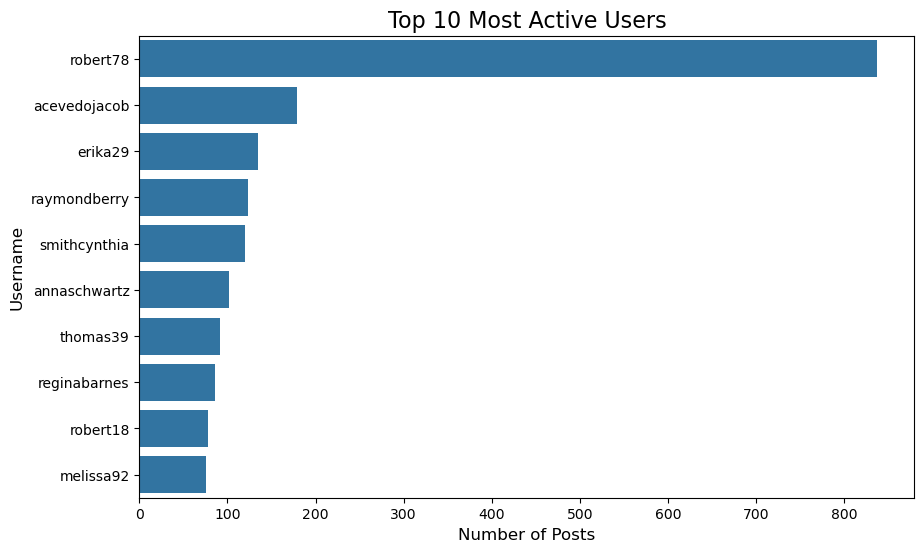

Basic User Statistics:
Total number of users: 37685
Average Posts per User: 1.86
Median Posts per User: 1.0
Maximum Posts by a Single User: 838
Number of Users with Only One Post: 25698
Percentage of Inactive Users: 68.19%

Top 10 Users with Most Activity:
               user  post_count
28770      robert78         838
146    acevedojacob         179
10142       erika29         135
27852  raymondberry         123
31377  smithcynthia         120
1847   annaschwartz         102
33078      thomas39          91
28110  reginabarnes          86
28724      robert18          78
22846     melissa92          76


In [31]:
user_activity = df.groupby('user').size().reset_index(name='post_count')

# Sort by activity
top_users = user_activity.sort_values(by='post_count', ascending=False).head(10)

# Plot 2: Top 10 Most Active Users
plt.figure(figsize=(10, 6))
sns.barplot(x='post_count', y='user', data=top_users)
plt.title('Top 10 Most Active Users', fontsize=16)
plt.xlabel('Number of Posts', fontsize=12)
plt.ylabel('Username', fontsize=12)
plt.show()

# Basic User Statistics
total_users = user_activity.shape[0]
average_posts_per_user = user_activity['post_count'].mean()
median_posts_per_user = user_activity['post_count'].median()
max_posts_by_user = user_activity['post_count'].max()

print("Basic User Statistics:")
print(f"Total number of users: {total_users}")
print(f"Average Posts per User: {average_posts_per_user:.2f}")
print(f"Median Posts per User: {median_posts_per_user}")
print(f"Maximum Posts by a Single User: {max_posts_by_user}")

# Identify users with only one post (inactive users)
inactive_users = user_activity[user_activity['post_count'] == 1].shape[0]

print(f"Number of Users with Only One Post: {inactive_users}")
print(f"Percentage of Inactive Users: {inactive_users / total_users * 100:.2f}%")

# Usernames with Most Activity
if 'user' in df.columns:
    user_activity_with_names = df.groupby(['user']).size().reset_index(name='post_count')
    top_usernames = user_activity_with_names.sort_values(by='post_count', ascending=False).head(10)

    print("\nTop 10 Users with Most Activity:")
    print(top_usernames)

Number of Users Responsible for 90% of the Posts: 30659


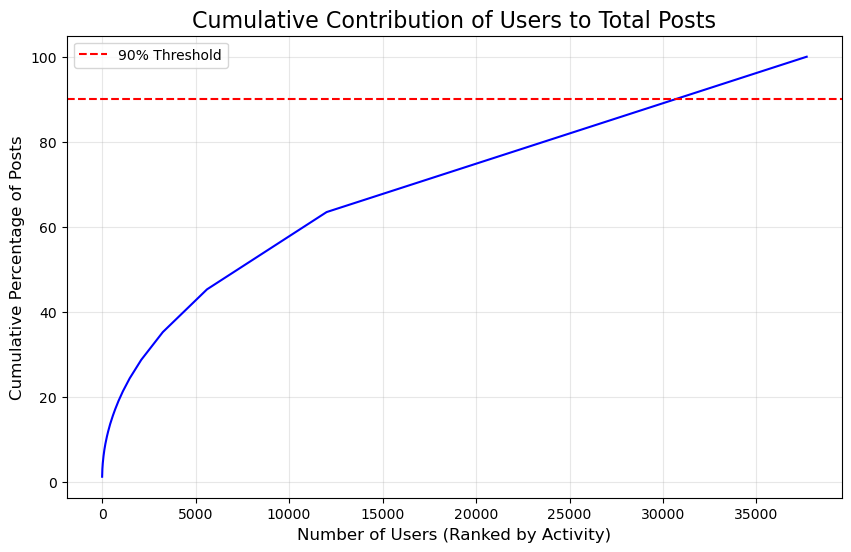

In [32]:
total_posts = user_activity['post_count'].sum()
user_activity_sorted = user_activity.sort_values(by='post_count', ascending=False)
user_activity_sorted['cumulative_posts'] = user_activity_sorted['post_count'].cumsum()
user_activity_sorted['cumulative_percentage'] = (user_activity_sorted['cumulative_posts'] / total_posts) * 100
num_users_90_percent = (user_activity_sorted['cumulative_percentage'] <= 90).sum()

print(f"Number of Users Responsible for 90% of the Posts: {num_users_90_percent}")

# Plot Cumulative Contribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=user_activity_sorted, x=range(len(user_activity_sorted)), y='cumulative_percentage', color='blue')
plt.axhline(90, color='red', linestyle='--', label='90% Threshold')
plt.title('Cumulative Contribution of Users to Total Posts', fontsize=16)
plt.xlabel('Number of Users (Ranked by Activity)', fontsize=12)
plt.ylabel('Cumulative Percentage of Posts', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()